# Importaciones

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import re

In [80]:
pd.set_option('display.max_rows', None)

# Carga de datos

In [81]:
# Cargar los datos
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_df = pd.read_csv('data/sample_submission.csv')

# Primeras exploraciones

In [82]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           391 non-null    int64  
 1   Price_euros  391 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


In [83]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


In [84]:
test_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,824,833,Lenovo,ThinkPad X1,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13kg
1,101,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg
2,1157,1175,Lenovo,ThinkPad T460s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,512GB SSD,Intel HD Graphics 520,Windows 7,1.4kg
3,940,954,HP,Omen 17-W006na,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75kg
4,853,864,Lenovo,ThinkPad T470p,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96kg


In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [86]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    object 
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


In [87]:
train_df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.00000
mean,652.099781,661.273026,15.060746,1126.92034
std,375.428905,380.297415,1.412363,696.08887
min,0.000000,1.000000,10.100000,174.00000
25%,332.500000,338.500000,14.000000,589.00000
50%,655.500000,663.500000,15.600000,952.00000
75%,980.500000,994.500000,15.600000,1499.00000
max,1301.000000,1319.000000,18.400000,4899.00000


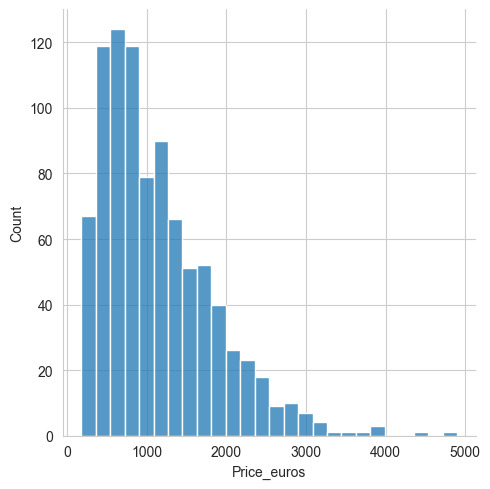

In [88]:
sns.displot(train_df['Price_euros']);

In [89]:
train_df[['Price_euros', 'Inches']].corr()

,Price_euros,Inches
Price_euros,1.000000,0.070152
Inches,0.070152,1.000000


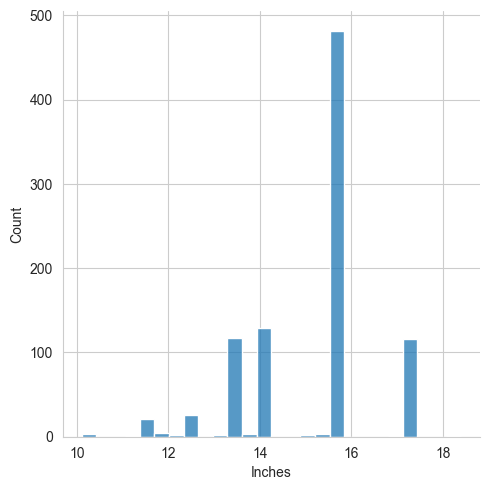

In [90]:
sns.displot(train_df['Inches']);

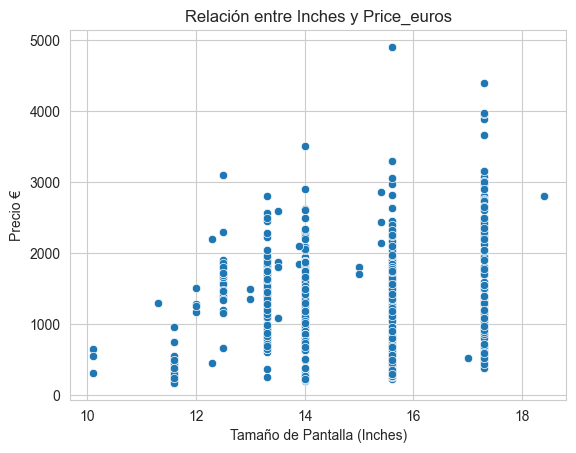

In [91]:
sns.scatterplot(data=train_df, x='Inches', y='Price_euros')
plt.title("Relación entre Inches y Price_euros")
plt.xlabel("Tamaño de Pantalla (Inches)")
plt.ylabel("Precio €")
plt.show()

# Limpieza de datos

In [92]:
train_df['Company'].unique()

array(['Asus', 'Lenovo', 'Dell', 'Mediacom', 'Toshiba', 'HP', 'Acer',
       'Apple', 'MSI', 'Fujitsu', 'Samsung', 'Chuwi', 'Microsoft',
       'Razer', 'Xiaomi', 'Huawei', 'Google', 'Vero', 'LG'], dtype=object)

In [93]:
train_df['Company'].value_counts()

Company
Dell         218
HP           197
Lenovo       193
Asus         110
Acer          76
Toshiba       37
MSI           36
Apple         17
Mediacom       6
Samsung        5
Microsoft      4
Razer          4
Xiaomi         2
Huawei         2
Google         1
Vero           1
Fujitsu        1
Chuwi          1
LG             1
Name: count, dtype: int64

In [94]:
# Cambiar temporalmente el límite de filas mostradas
with pd.option_context('display.max_rows', None):
    print(train_df['Product'].value_counts())

Product
Inspiron 3567                                    24
XPS 13                                           21
Vostro 3568                                      15
250 G6                                           13
Inspiron 5570                                    12
Legion Y520-15IKBN                               12
Inspiron 5567                                    11
Alienware 17                                     11
Latitude 5580                                    10
Satellite Pro                                    10
Inspiron 7567                                    10
ProBook 450                                      10
Aspire 3                                          9
MacBook Pro                                       9
EliteBook 840                                     9
Vostro 5568                                       8
EliteBook 820                                     6
ProBook 470                                       6
ThinkPad Yoga                                     6
Elit

In [95]:
train_df['TypeName'].value_counts()

TypeName
Notebook              516
Gaming                143
Ultrabook             130
2 in 1 Convertible     84
Workstation            22
Netbook                17
Name: count, dtype: int64

In [96]:
train_df['Inches'].value_counts()

Inches
15.6    481
14.0    129
17.3    116
13.3    113
12.5     26
11.6     21
12.0      4
13.5      4
15.4      3
13.9      3
10.1      3
13.0      2
12.3      2
15.0      2
18.4      1
11.3      1
17.0      1
Name: count, dtype: int64

In [97]:
train_df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                362
1366x768                                         207
IPS Panel Full HD 1920x1080                      145
IPS Panel Full HD / Touchscreen 1920x1080         37
Full HD / Touchscreen 1920x1080                   34
1600x900                                          15
Quad HD+ / Touchscreen 3200x1800                  10
Touchscreen 1366x768                               9
IPS Panel 4K Ultra HD 3840x2160                    9
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      7
IPS Panel Retina Display 2560x1600                 6
4K Ultra HD 3840x2160                              6
4K Ultra HD / Touchscreen 3840x2160                6
IPS Panel 1366x768                                 5
IPS Panel Retina Display 2304x1440                 4
IPS Panel Touchscreen 2560x1440                    4
IPS Panel 2560x1440                                4
IPS Panel Quad HD+ / Touchscreen 3200x1800         4
Touchscreen 2256x1504        

In [98]:
train_df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              143
Intel Core i7 7700HQ 2.8GHz             107
Intel Core i7 7500U 2.7GHz               87
Intel Core i3 6006U 2GHz                 51
Intel Core i7 8550U 1.8GHz               46
Intel Core i5 8250U 1.6GHz               45
Intel Core i5 6200U 2.3GHz               43
Intel Core i7 6500U 2.5GHz               36
Intel Core i3 7100U 2.4GHz               28
Intel Core i7 6700HQ 2.6GHz              27
Intel Core i5 7300HQ 2.5GHz              21
Intel Celeron Dual Core N3060 1.6GHz     20
Intel Celeron Dual Core N3350 1.1GHz     19
Intel Core i3 6006U 2.0GHz               13
Intel Core i7 6600U 2.6GHz               12
Intel Core i7 7600U 2.8GHz               11
Intel Core i5 7300U 2.6GHz               11
AMD A9-Series 9420 3GHz                  10
Intel Core i5 6300U 2.4GHz                9
Intel Pentium Quad Core N4200 1.1GHz      9
Intel Core i7 6820HK 2.7GHz               8
Intel Core i3 6100U 2.3GHz                6
Intel Pentium Quad Core N371

In [99]:
train_df['Ram'].value_counts()

Ram
8GB     428
4GB     266
16GB    140
6GB      31
12GB     20
2GB      14
32GB     11
24GB      1
64GB      1
Name: count, dtype: int64

In [100]:
train_df['Memory'].value_counts()

Memory
256GB SSD                        284
1TB HDD                          173
500GB HDD                         85
512GB SSD                         80
128GB SSD +  1TB HDD              65
128GB SSD                         53
256GB SSD +  1TB HDD              50
32GB Flash Storage                27
512GB SSD +  1TB HDD              11
1TB SSD                           10
64GB Flash Storage                10
2TB HDD                            9
256GB SSD +  2TB HDD               9
32GB SSD                           6
1.0TB Hybrid                       6
16GB Flash Storage                 5
256GB Flash Storage                4
512GB SSD +  2TB HDD               3
128GB Flash Storage                2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
32GB HDD                           1
1TB SSD +  1TB HDD                 1
1TB HDD +  1TB HDD                 1
240GB SSD                          1
64GB SSD                       

In [101]:
train_df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620             191
Intel HD Graphics 520             132
Intel UHD Graphics 620             47
Nvidia GeForce GTX 1050            40
Nvidia GeForce GTX 1060            39
Nvidia GeForce 940MX               31
Intel HD Graphics 500              28
AMD Radeon 530                     27
Intel HD Graphics 400              25
Nvidia GeForce GTX 1070            24
Nvidia GeForce GTX 1050 Ti         23
AMD Radeon R5 M430                 19
Intel HD Graphics                  16
AMD Radeon 520                     13
Nvidia GeForce 930MX               13
Intel HD Graphics 515              11
AMD Radeon R7 M445                 10
AMD Radeon R5                      10
Nvidia GeForce 920MX               10
Nvidia GeForce MX150                9
Intel HD Graphics 615               9
Intel Iris Plus Graphics 640        8
Intel HD Graphics 505               7
AMD Radeon R5 M420                  7
Nvidia GeForce GTX 950M             7
Nvidia GeForce GTX 980M             6
Nvidia G

In [102]:
train_df['OpSys'].value_counts()

OpSys
Windows 10      745
Linux            46
No OS            46
Windows 7        33
Chrome OS        18
macOS            11
Mac OS X          6
Windows 10 S      5
Android           2
Name: count, dtype: int64

In [103]:
columns_to_drop = ['laptop_ID', 'Product']
train_df = train_df.drop(columns=columns_to_drop)

In [104]:
train_df.head()

,id,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,Asus,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,864,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1176,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


In [105]:
# Procesar la columna 'Weight' y convertirla a numérico
train_df['Weight'] = train_df['Weight'].astype(str).str.replace('kg', '', regex=False).astype(float)
test_df['Weight'] = test_df['Weight'].astype(str).str.replace('kg', '', regex=False).astype(float)

# Procesar la columna 'Ram' y convertirla a numérico
train_df['Ram'] = train_df['Ram'].astype(str).str.replace('GB', '', regex=False).astype(int)
test_df['Ram'] = test_df['Ram'].astype(str).str.replace('GB', '', regex=False).astype(int)

# Extraer la resolución de pantalla y combinarla en una sola columna 'Resolution'
train_df[['res_width', 'res_height']] = train_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)
test_df[['res_width', 'res_height']] = test_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)

# Combinar 'res_width' y 'res_height' en una sola columna 'Resolution'
train_df['Resolution'] = train_df['res_width'] * train_df['res_height']
test_df['Resolution'] = test_df['res_width'] * test_df['res_height']

# Eliminar las columnas 'res_width' y 'res_height'
train_df = train_df.drop(columns=['res_width', 'res_height'])
test_df = test_df.drop(columns=['res_width', 'res_height'])

# Procesar la columna 'Memory' para separar SSD, HDD, Flash Storage y Hybrid
def parse_memory_details(memory_str):
    if isinstance(memory_str, str):
        memory_str = memory_str.strip().lower()
        ssd = 0
        hdd = 0
        flash = 0
        hybrid = 0
        if 'ssd' in memory_str:
            ssd_match = re.search(r'(\d+\.?\d*)\s*gb ssd|(\d+\.?\d*)\s*tb ssd', memory_str)
            if ssd_match:
                ssd_value = ssd_match.group(1) or ssd_match.group(2)
                ssd = float(ssd_value) * 1024 if 'tb' in memory_str else float(ssd_value)
        if 'hdd' in memory_str:
            hdd_match = re.search(r'(\d+\.?\d*)\s*gb hdd|(\d+\.?\d*)\s*tb hdd', memory_str)
            if hdd_match:
                hdd_value = hdd_match.group(1) or hdd_match.group(2)
                hdd = float(hdd_value) * 1024 if 'tb' in memory_str else float(hdd_value)
        if 'flash storage' in memory_str:
            flash = 1
        if 'hybrid' in memory_str:
            hybrid = 1
        return ssd, hdd, flash, hybrid
    return 0, 0, 0, 0

# Aplicar la función a la columna 'Memory'
train_df[['Memory_SSD', 'Memory_HDD', 'Flash_Storage', 'Hybrid']] = train_df['Memory'].apply(
    lambda x: pd.Series(parse_memory_details(x))
)
test_df[['Memory_SSD', 'Memory_HDD', 'Flash_Storage', 'Hybrid']] = test_df['Memory'].apply(
    lambda x: pd.Series(parse_memory_details(x))
)

# Eliminar la columna original 'Memory'
train_df = train_df.drop(columns=['Memory'])
test_df = test_df.drop(columns=['Memory'])

# Procesar la columna 'Cpu' para extraer detalles
def parse_cpu_details(cpu_str):
    if isinstance(cpu_str, str):
        cpu_str = cpu_str.strip().lower()
        cores = re.search(r'(\d+)\s*core', cpu_str)
        cores = int(cores.group(1)) if cores else 0
        frequency = re.search(r'(\d+\.?\d*)\s*ghz', cpu_str)
        frequency = float(frequency.group(1)) if frequency else 0.0
        if 'intel' in cpu_str:
            family = 'Intel'
        elif 'amd' in cpu_str:
            family = 'AMD'
        else:
            family = 'Other'
        series = re.search(r'(i\d|ryzen \d)', cpu_str)
        series = series.group(1) if series else 'Other'
        return cores, frequency, family, series
    return 0, 0.0, 'Other', 'Other'

train_df[['Cpu_Cores', 'Cpu_Frequency', 'Cpu_Family', 'Cpu_Series']] = train_df['Cpu'].apply(
    lambda x: pd.Series(parse_cpu_details(x))
)
test_df[['Cpu_Cores', 'Cpu_Frequency', 'Cpu_Family', 'Cpu_Series']] = test_df['Cpu'].apply(
    lambda x: pd.Series(parse_cpu_details(x))
)

train_df = train_df.drop(columns=['Cpu'])
test_df = test_df.drop(columns=['Cpu'])

train_df = pd.get_dummies(train_df, columns=['Cpu_Family', 'Cpu_Series'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Cpu_Family', 'Cpu_Series'], drop_first=True)

# Procesar la columna 'Gpu' para extraer detalles adicionales
def parse_gpu_details(gpu_str):
    if isinstance(gpu_str, str):
        gpu_str = gpu_str.strip().lower()
        if 'nvidia' in gpu_str:
            brand = 'NVIDIA'
        elif 'amd' in gpu_str:
            brand = 'AMD'
        elif 'intel' in gpu_str:
            brand = 'Intel'
        else:
            brand = 'Other'
        family = re.search(r'(gtx|rtx|radeon|iris|hd graphics)', gpu_str)
        family = family.group(1) if family else 'Other'
        model = re.search(r'\b(\d+)\b', gpu_str)
        model = model.group(1) if model else 'Unknown'
        return brand, family, model
    return 'Other', 'Other', 'Unknown'

train_df[['Gpu_Brand', 'Gpu_Family', 'Gpu_Model']] = train_df['Gpu'].apply(
    lambda x: pd.Series(parse_gpu_details(x))
)
test_df[['Gpu_Brand', 'Gpu_Family', 'Gpu_Model']] = test_df['Gpu'].apply(
    lambda x: pd.Series(parse_gpu_details(x))
)

train_df = pd.get_dummies(train_df, columns=['Gpu_Brand', 'Gpu_Family'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gpu_Brand', 'Gpu_Family'], drop_first=True)

def convert_gpu_model_to_numeric(model):
    try:
        return int(model)
    except ValueError:
        return 0

train_df['Gpu_Model'] = train_df['Gpu_Model'].apply(convert_gpu_model_to_numeric)
test_df['Gpu_Model'] = test_df['Gpu_Model'].apply(convert_gpu_model_to_numeric)

# Procesar la columna 'Company' como variable categórica
train_companies = pd.get_dummies(train_df['Company'], prefix='Company')
test_companies = pd.get_dummies(test_df['Company'], prefix='Company')

# Asegurar que ambas tablas tengan las mismas columnas
common_cols = train_companies.columns.union(test_companies.columns)

train_companies = train_companies.reindex(columns=common_cols, fill_value=0)
test_companies = test_companies.reindex(columns=common_cols, fill_value=0)

train_df = pd.concat([train_df, train_companies], axis=1)
test_df = pd.concat([test_df, test_companies], axis=1)

train_df = train_df.drop(columns=['Company'])
test_df = test_df.drop(columns=['Company'])

# Seleccionar las características finales
features_to_use_improved = (
    ['Inches', 'Ram', 'Weight', 'Resolution', 'Memory_SSD', 'Memory_HDD', 'Flash_Storage', 'Hybrid', 'Cpu_Cores', 'Cpu_Frequency', 'Gpu_Model']
    + [col for col in train_df.columns if col.startswith('Cpu_Family_') or col.startswith('Cpu_Series_') or col.startswith('Gpu_Brand_') or col.startswith('Gpu_Family_') or col.startswith('Company_')]
)

# Crear los conjuntos de entrenamiento y prueba
X_train_improved = train_df[features_to_use_improved]
X_test_improved = test_df[features_to_use_improved]

# Manejar columnas faltantes en el conjunto de prueba
missing_cols_test = set(X_train_improved.columns) - set(X_test_improved.columns)
for col in missing_cols_test:
    X_test_improved[col] = 0
X_test_improved = X_test_improved[X_train_improved.columns]

# Separar la variable objetivo (target)
y_train = train_df['Price_euros']

# Dividir los datos en conjunto de entrenamiento y validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_improved, y_train, test_size=0.2, random_state=42
)

# Aplicar la transformación logarítmica para la variable objetivo
y_train_log = np.log1p(y_train_split)
y_val_log = np.log1p(y_val_split)

# Normalizar las características numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

In [106]:
y_train_log.info()

<class 'pandas.core.series.Series'>
Index: 729 entries, 25 to 102
Series name: Price_euros
Non-Null Count  Dtype  
--------------  -----  
729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


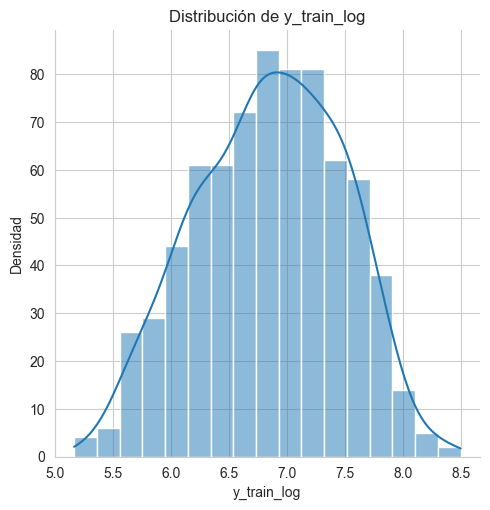

In [107]:
# Visualizar la distribución de y_train_log
sns.displot(y_train_log, kde=True)  # kde=True añade la línea de densidad
plt.title('Distribución de y_train_log')
plt.xlabel('y_train_log')
plt.ylabel('Densidad')
plt.show()

In [108]:
X_train_improved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inches                  912 non-null    float64
 1   Ram                     912 non-null    int32  
 2   Weight                  912 non-null    float64
 3   Resolution              912 non-null    float64
 4   Memory_SSD              912 non-null    float64
 5   Memory_HDD              912 non-null    float64
 6   Flash_Storage           912 non-null    float64
 7   Hybrid                  912 non-null    float64
 8   Cpu_Cores               912 non-null    int64  
 9   Cpu_Frequency           912 non-null    float64
 10  Gpu_Model               912 non-null    int64  
 11  Cpu_Family_Intel        912 non-null    bool   
 12  Cpu_Series_i3           912 non-null    bool   
 13  Cpu_Series_i5           912 non-null    bool   
 14  Cpu_Series_i7           912 non-null    bo

In [109]:
X_train_improved.describe()

,Inches,Ram,Weight,Resolution,Memory_SSD,Memory_HDD,Flash_Storage,Hybrid,Cpu_Cores,Cpu_Frequency,Gpu_Model
count,912.000000,912.000000,912.000000,9.120000e+02,912.000000,912.000000,912.000000,912.000000,912.0,912.000000,912.000000
mean,15.060746,8.357456,2.053658,2.157365e+06,34927.486842,436.364035,0.055921,0.008772,0.0,2.316623,512.615132
std,1.412363,5.108641,0.659502,1.386117e+06,93667.839140,531.194697,0.229895,0.093298,0.0,0.501611,524.189184
min,10.100000,2.000000,0.690000,1.049088e+06,0.000000,0.000000,0.000000,0.000000,0.0,0.900000,0.000000
25%,14.000000,4.000000,1.557500,1.440000e+06,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000
50%,15.600000,8.000000,2.060000,2.073600e+06,256.000000,0.000000,0.000000,0.000000,0.0,2.500000,520.000000
75%,15.600000,8.000000,2.310000,2.073600e+06,512.000000,1024.000000,0.000000,0.000000,0.0,2.700000,620.000000
max,18.400000,64.000000,4.700000,8.294400e+06,524288.000000,2048.000000,1.000000,1.000000,0.0,3.600000,6000.000000


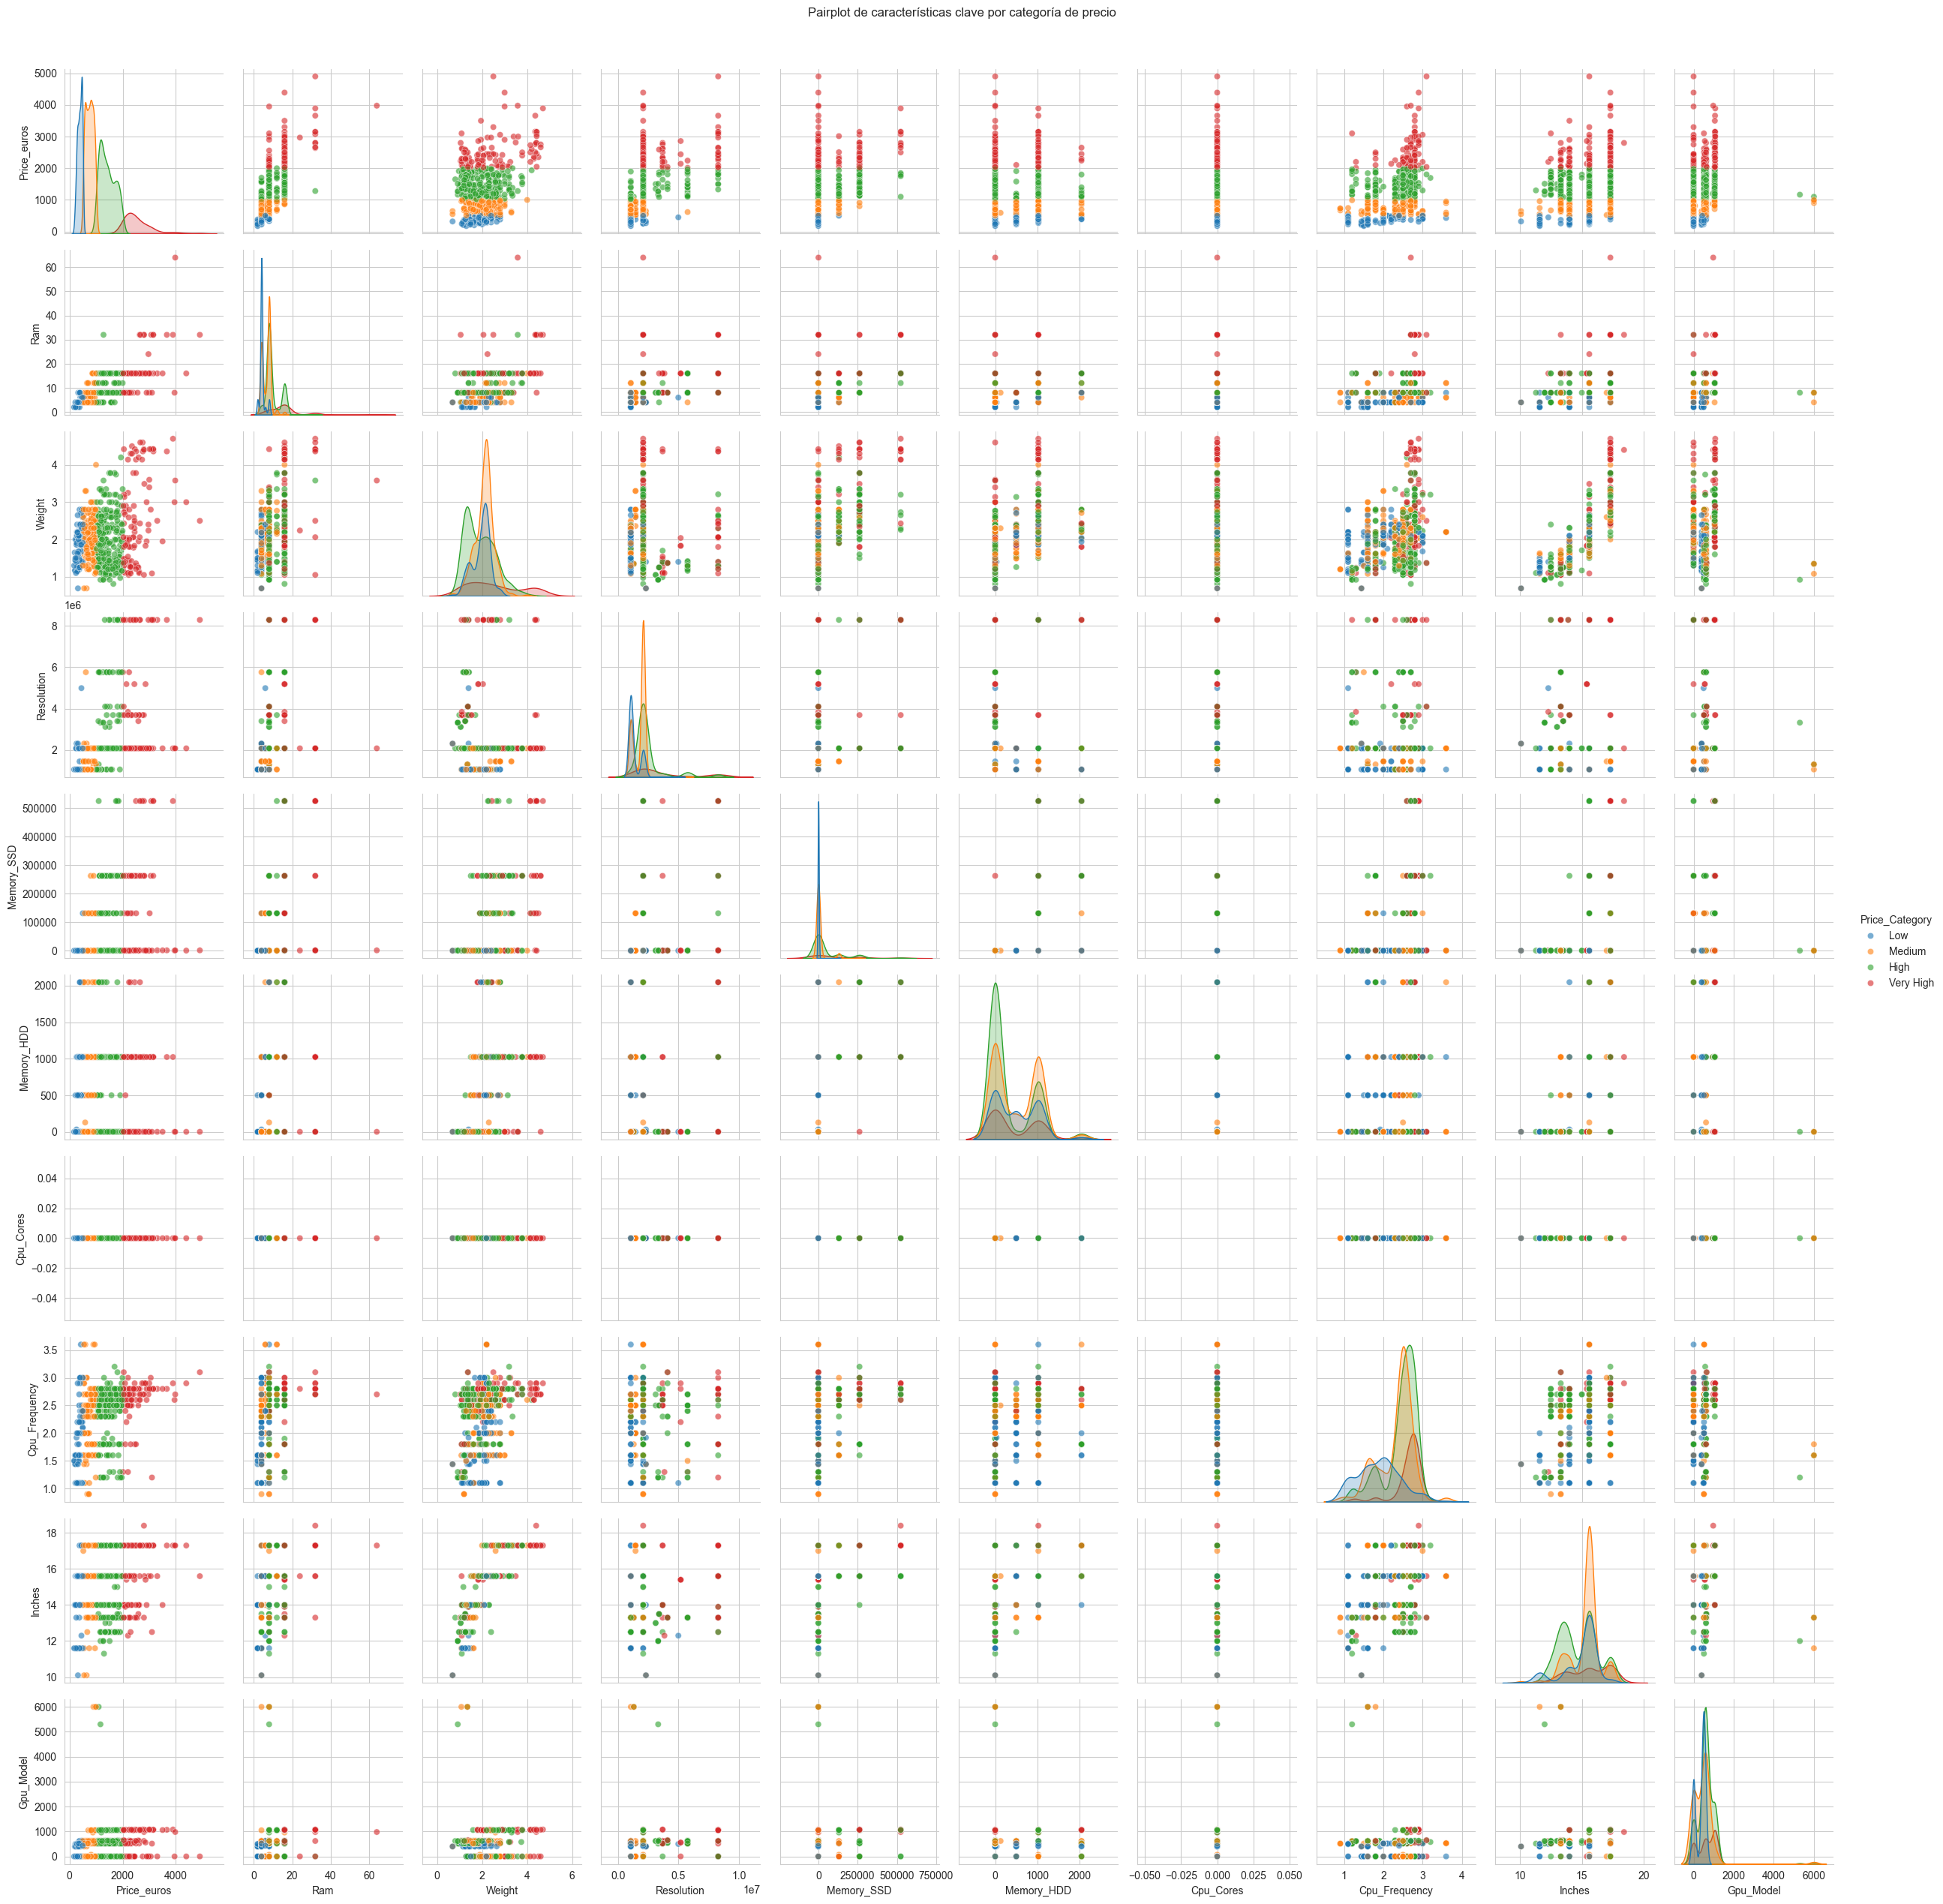

In [110]:
# Seleccionar un subconjunto de variables numéricas clave
subset_columns = ['Price_euros', 'Ram', 'Weight', 'Resolution', 'Memory_SSD', 'Memory_HDD', 'Cpu_Cores', 'Cpu_Frequency', 'Inches','Gpu_Model']

# Crear un dataframe con las columnas seleccionadas
pairplot_df = train_df[subset_columns].copy()

# Crear categorías para 'Price_euros'
bins = [0, 500, 1000, 2000, 5000]  # Rango de precios
labels = ['Low', 'Medium', 'High', 'Very High']  # Etiquetas para las categorías
pairplot_df['Price_Category'] = pd.cut(pairplot_df['Price_euros'], bins=bins, labels=labels)

# Generar el pairplot con hue
sns.pairplot(pairplot_df, diag_kind='kde', hue='Price_Category', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot de características clave por categoría de precio", y=1.02)
plt.show()



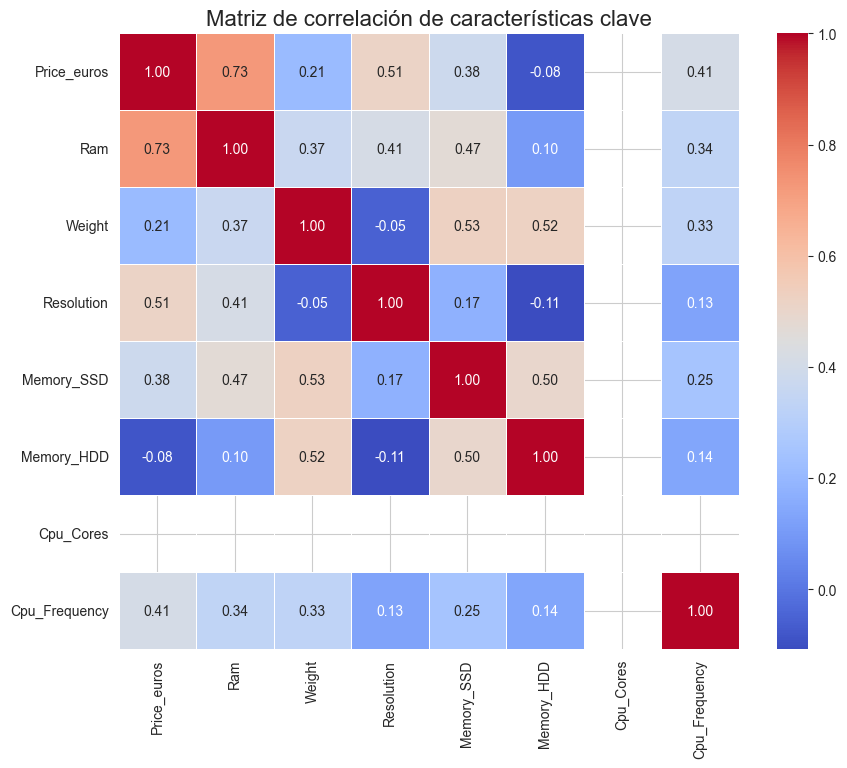

In [111]:
# Seleccionar las columnas numéricas clave para la matriz de correlación
correlation_columns = ['Price_euros', 'Ram', 'Weight', 'Resolution', 'Memory_SSD', 'Memory_HDD', 'Cpu_Cores', 'Cpu_Frequency']

# Calcular la matriz de correlación
correlation_matrix = train_df[correlation_columns].corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Visualizar la matriz de correlación como un heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=0.5
)

# Título del heatmap
plt.title("Matriz de correlación de características clave", fontsize=16)

# Mostrar el gráfico
plt.show()


Entrenando modelo: Random Forest...
Entrenando modelo: Gradient Boosting...
Entrenando modelo: XGBoost...
Tabla de Importancia de Características:
                        Random Forest  Gradient Boosting   XGBoost  \
Ram                      4.829482e-01           0.350390  0.256521   
Memory_SSD               1.118059e-01           0.209492  0.059602   
Weight                   1.264919e-01           0.104972  0.019528   
Cpu_Frequency            7.483896e-02           0.068556  0.026404   
Cpu_Series_i7            2.619697e-02           0.068881  0.067165   
Gpu_Family_radeon        5.951438e-03           0.011842  0.114305   
Resolution               3.402570e-02           0.053138  0.033582   
Gpu_Model                3.923498e-02           0.046142  0.025227   
Company_Razer            5.358726e-03           0.006125  0.068323   
Cpu_Series_i5            1.465818e-02           0.018589  0.036908   
Flash_Storage            2.687487e-03           0.003611  0.055331   
Inches       

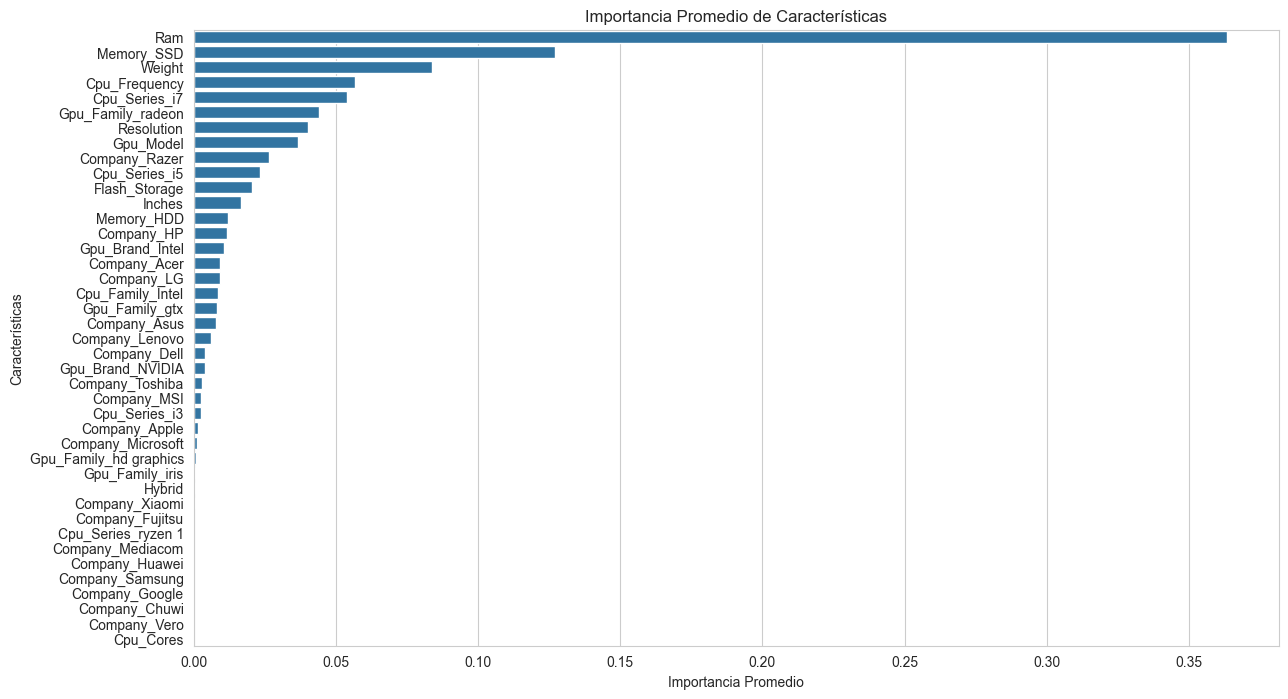

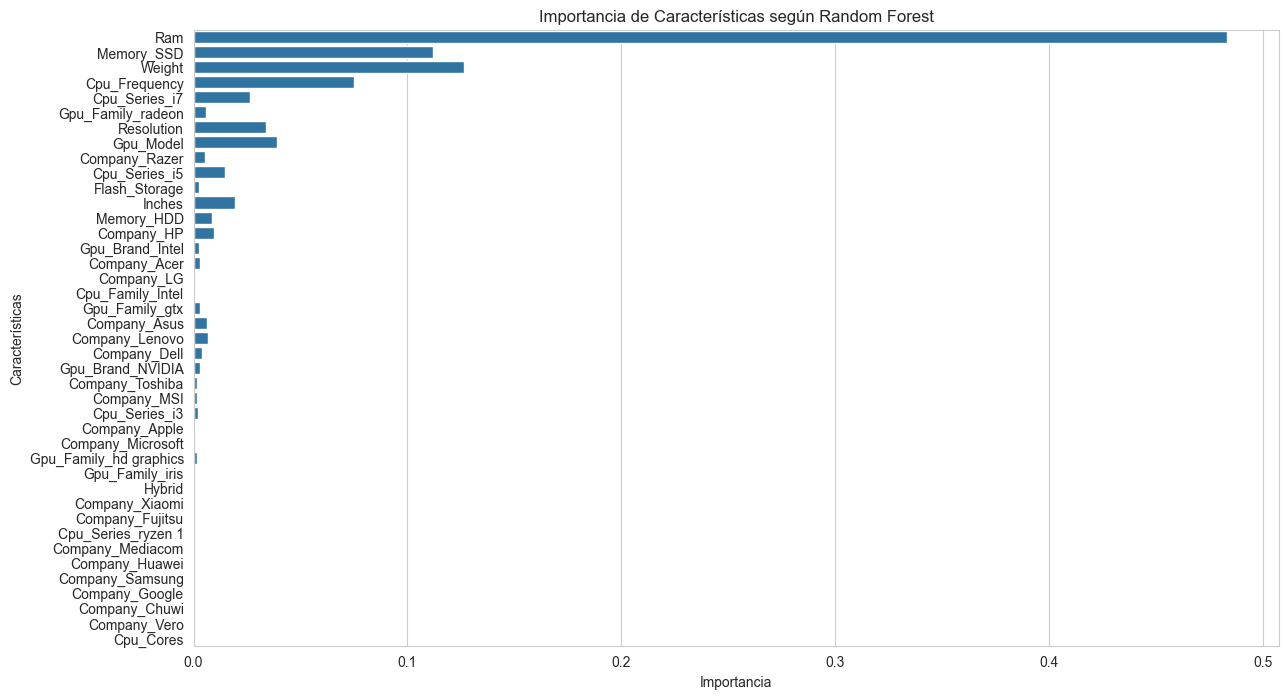

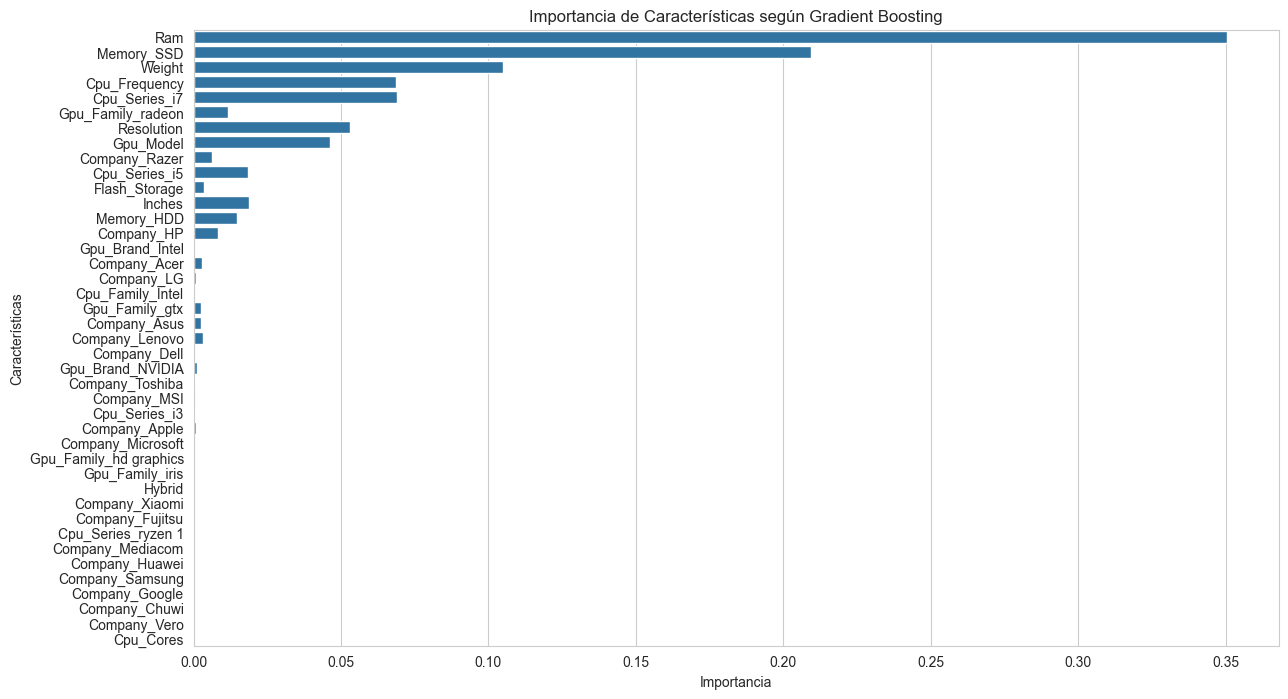

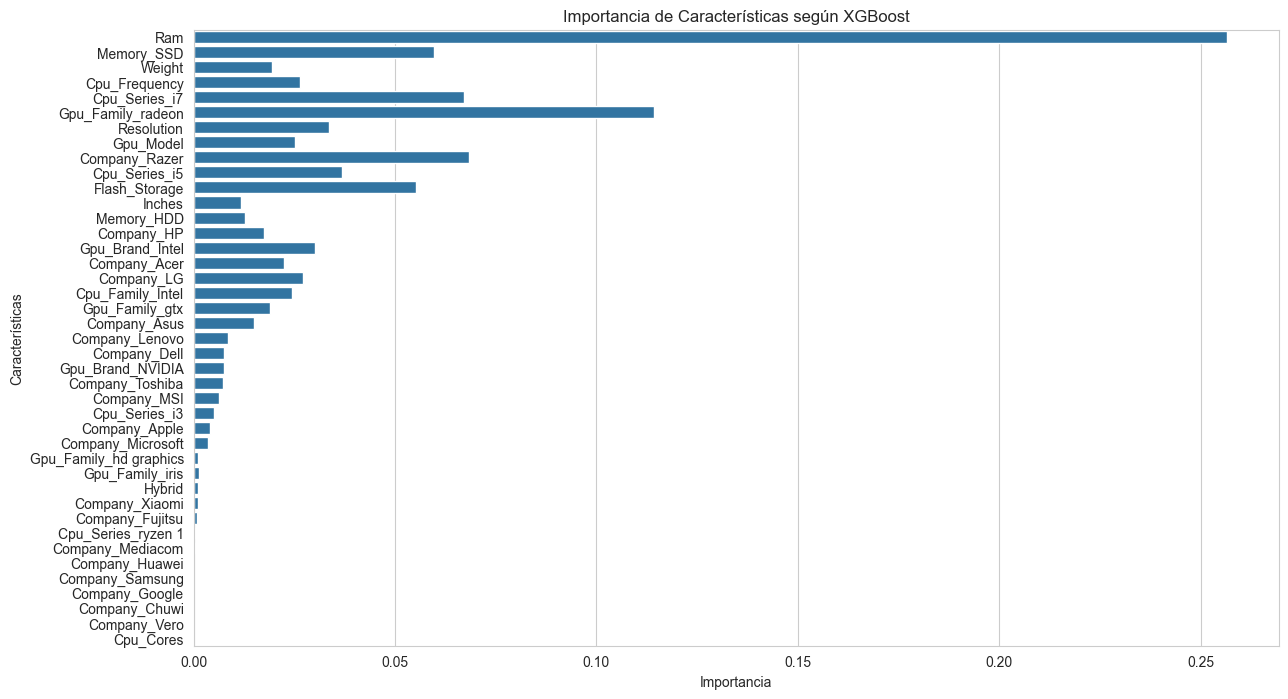

Dimensiones de X_train_filtered: (729, 28)
Dimensiones de X_val_filtered: (183, 28)


In [112]:
# Definir modelos a usar
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1)
}

# Crear un DataFrame para almacenar las importancias de características
feature_importances = pd.DataFrame(index=X_train_improved.columns)

# Iterar sobre los modelos para calcular importancias
for model_name, model in models.items():
    print(f"Entrenando modelo: {model_name}...")
    model.fit(X_train_improved, y_train)  # Entrenar modelo
    
    # Obtener importancias de características y agregarlas a la tabla
    feature_importances[model_name] = model.feature_importances_

# Calcular el promedio de importancias
feature_importances['Average Importance'] = feature_importances.mean(axis=1)

# Ordenar las características por su importancia promedio
feature_importances = feature_importances.sort_values(by='Average Importance', ascending=False)

# Mostrar la tabla de importancias
print("Tabla de Importancia de Características:")
print(feature_importances)

# Guardar los nombres de las características antes de hacer reset del índice
important_features = feature_importances[feature_importances['Average Importance'] > 0.001].index.tolist()

# Visualización de importancias
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={'index': 'Feature'}, inplace=True)

plt.figure(figsize=(14, 8))

# Crear un gráfico por modelo
sns.barplot(data=feature_importances, x='Average Importance', y='Feature', orient='h')
plt.title("Importancia Promedio de Características")
plt.xlabel("Importancia Promedio")
plt.ylabel("Características")
plt.show()

# Gráfico separado por modelo
for model_name in models.keys():
    plt.figure(figsize=(14, 8))
    sns.barplot(data=feature_importances, x=model_name, y='Feature', orient='h')
    plt.title(f"Importancia de Características según {model_name}")
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.show()

# Filtrar las características seleccionadas en X_train_split y X_val_split
X_train_filtered = X_train_split.loc[:, important_features]
X_val_filtered = X_val_split.loc[:, important_features]

# Comprobar dimensiones
print(f"Dimensiones de X_train_filtered: {X_train_filtered.shape}")
print(f"Dimensiones de X_val_filtered: {X_val_filtered.shape}")


In [113]:
X_train_improved.head()

,Inches,Ram,Weight,Resolution,Memory_SSD,Memory_HDD,Flash_Storage,Hybrid,Cpu_Cores,Cpu_Frequency,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,12.5,4,1.20,2073600.0,0.0,0.0,1.0,0.0,0,0.9,...,False,False,False,False,False,False,False,False,False,False
1,17.3,8,3.20,2073600.0,262144.0,1024.0,0.0,0.0,0,3.2,...,False,False,False,False,False,False,False,False,False,False
2,15.6,4,1.85,2073600.0,0.0,1024.0,0.0,0.0,0,2.7,...,False,True,False,False,False,False,False,False,False,False
3,13.3,16,1.29,5760000.0,512.0,0.0,0.0,0.0,0,2.5,...,False,False,False,False,False,False,False,False,False,False
4,15.6,4,2.32,2073600.0,0.0,0.0,0.0,1.0,0,2.5,...,False,True,False,False,False,False,False,False,False,False


In [114]:
# Seleccionar características importantes con un umbral
threshold = 0.002

# features_to_keep debe contener los nombres de las columnas, no índices
features_to_keep = feature_importances[feature_importances['Average Importance'] > threshold]['Feature'].tolist()

# Comprobar las características seleccionadas
print(f"Características seleccionadas: {features_to_keep}")

# Filtrar X_train_split y X_val_split para incluir solo las características seleccionadas
X_train_filtered = X_train_split.loc[:, features_to_keep]
X_val_filtered = X_val_split.loc[:, features_to_keep]

# Comprobar dimensiones
print(f"Dimensiones de X_train_filtered: {X_train_filtered.shape}")
print(f"Dimensiones de X_val_filtered: {X_val_filtered.shape}")



Características seleccionadas: ['Ram', 'Memory_SSD', 'Weight', 'Cpu_Frequency', 'Cpu_Series_i7', 'Gpu_Family_radeon', 'Resolution', 'Gpu_Model', 'Company_Razer', 'Cpu_Series_i5', 'Flash_Storage', 'Inches', 'Memory_HDD', 'Company_HP', 'Gpu_Brand_Intel', 'Company_Acer', 'Company_LG', 'Cpu_Family_Intel', 'Gpu_Family_gtx', 'Company_Asus', 'Company_Lenovo', 'Company_Dell', 'Gpu_Brand_NVIDIA', 'Company_Toshiba', 'Company_MSI', 'Cpu_Series_i3']
Dimensiones de X_train_filtered: (729, 26)
Dimensiones de X_val_filtered: (183, 26)


## Predicciones y archivo salida

In [115]:
# Definir los modelos y sus hiperparámetros
models_params = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [100, 150, 200],
            "max_depth": [ 10, 12, 15],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 3],
        },
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 150, 200, 250],
            "learning_rate": [0.05, 0.08, 0.12],
            "max_depth": [6, 8],
            "subsample": [0.8, 1.0],
        },
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42, n_jobs=-1, eval_metric='logloss'),
        "params": {
            "n_estimators": [ 200, 250, 300],
            "max_depth": [6, 8],
            "learning_rate": [0.05, 0.08, 1.0],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8],
        },
    },
}

# Diccionario para almacenar resultados
results = {}

# Iterar sobre los modelos y realizar GridSearchCV
for model_name, config in models_params.items():
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=5,
        scoring="neg_mean_absolute_error",
        n_jobs=-1,
        verbose=2,
    )
    grid_search.fit(X_train_filtered, y_train_log)
    
    # Obtener el mejor modelo y evaluar
    best_model = grid_search.best_estimator_
    y_pred_log = best_model.predict(X_val_filtered)
    y_pred = np.expm1(y_pred_log)  # Invertir logaritmo para obtener valores originales
    mae = mean_absolute_error(y_val_split, y_pred)
    
    print(f"Mejores parámetros para {model_name}: {grid_search.best_params_}")
    print(f"MAE para {model_name}: {mae}")
    
    # Guardar resultados
    results[model_name] = {
        "best_model": best_model,
        "best_params": grid_search.best_params_,
        "mae": mae,
    }

# Mostrar el modelo con mejor rendimiento
best_model_name = min(results, key=lambda x: results[x]["mae"])
print(f"El mejor modelo es {best_model_name} con un MAE de {results[best_model_name]['mae']}")

Optimizing Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros para Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
MAE para Random Forest: 187.7826609536171
Optimizing Gradient Boosting...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros para Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
MAE para Gradient Boosting: 168.57348474302736
Optimizing XGBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros para XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
MAE para XGBoost: 166.6040324193402
El mejor modelo es XGBoost con un MAE de 166.6040324193402


In [116]:
# Asegurar que X_test_improved tenga las mismas columnas que X_train_filtered
missing_cols_test = set(X_train_filtered.columns) - set(X_test_improved.columns)
for col in missing_cols_test:
    X_test_improved[col] = 0

# Reordenar las columnas de X_test_improved para que coincidan con X_train_filtered
X_test_improved = X_test_improved[X_train_filtered.columns]

# Predecir en el conjunto de prueba
y_pred_test_log = best_model.predict(X_test_improved)

# Invertir la transformación logarítmica para obtener los valores originales
y_pred_test = np.expm1(y_pred_test_log)

# Mostrar algunos resultados
print(f"Predicciones del conjunto de prueba: {y_pred_test[:10]}")




Predicciones del conjunto de prueba: [1140.6543   353.03314 1698.4425  1147.8546  1491.9999  3191.622
  365.35596 1022.3489  1781.6844  1629.3075 ]


MAE: 166.60
RMSE: 270.47


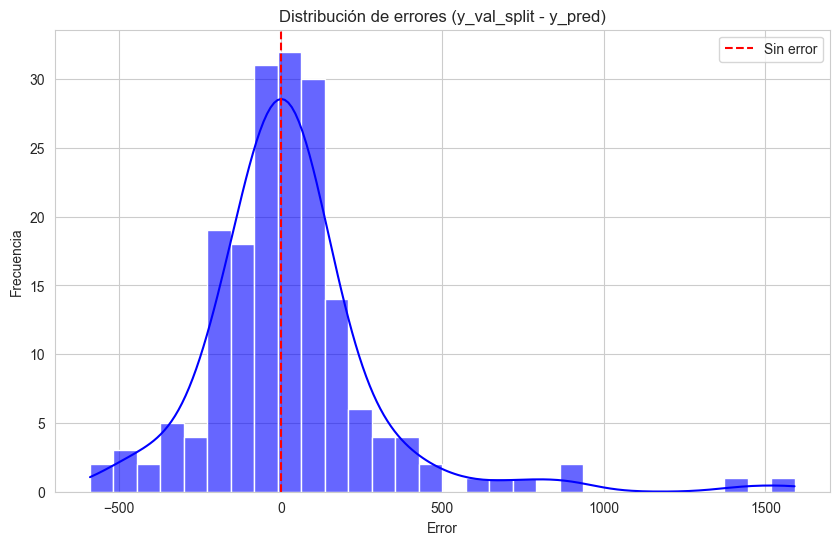

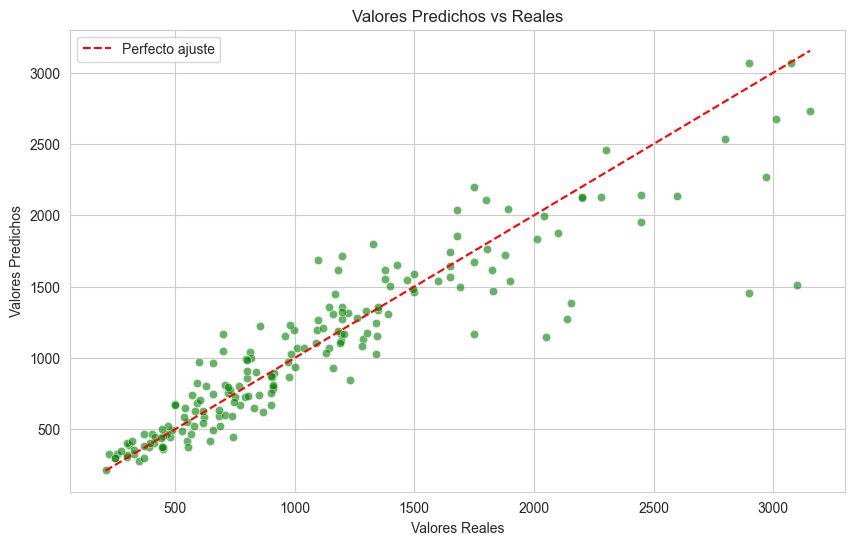

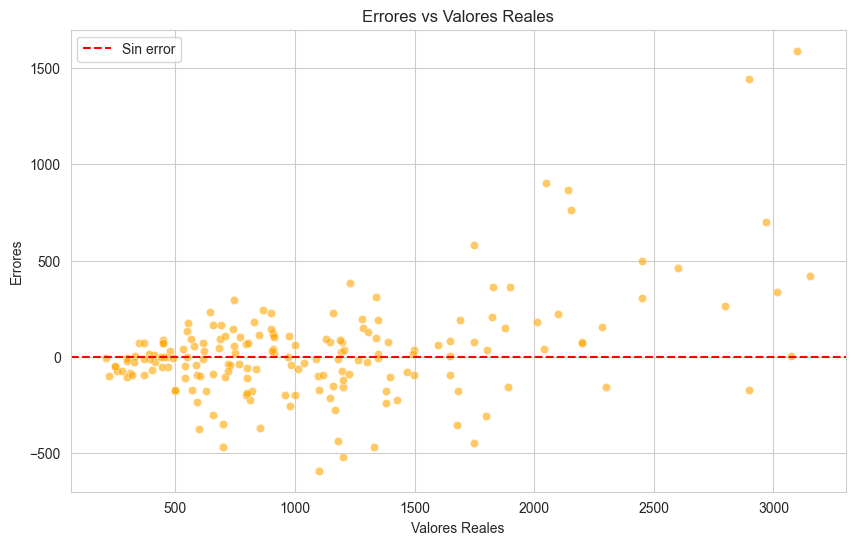

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predecir con el modelo entrenado (asegúrate de usar tu modelo final)
y_pred_log = best_model.predict(X_val_filtered)
y_pred = np.expm1(y_pred_log)  # Revertir la transformación logarítmica

# Calcular los errores
errors = y_val_split - y_pred
mae = mean_absolute_error(y_val_split, y_pred)
rmse = np.sqrt(mean_squared_error(y_val_split, y_pred))

# Mostrar métricas de error
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Gráfico 1: Histograma de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='blue', alpha=0.6)
plt.title("Distribución de errores (y_val_split - y_pred)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.axvline(x=0, color='red', linestyle='--', label='Sin error')
plt.legend()
plt.show()

# Gráfico 2: Valores predichos vs valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_split, y=y_pred, alpha=0.6, color='green')
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], color='red', linestyle='--', label='Perfecto ajuste')
plt.title("Valores Predichos vs Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.legend()
plt.show()

# Gráfico 3: Gráfico de dispersión de errores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_split, y=errors, alpha=0.6, color='orange')
plt.axhline(y=0, color='red', linestyle='--', label='Sin error')
plt.title("Errores vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Errores")
plt.legend()
plt.show()
